## Regressió lineal

Comencem la modelització de les dades amb un model d'aprenentage supervisat de regressió lineal. El que farem será identificar posibles relacions entre les variables del nostre dataset. Per veure aquestes relacions treballarem amb eines de càlcul com la matriu de correlació i les diferents eines de visualització que ens permetran identificar relacions en base a la representació gràfica de les variables. Catalogarem els atributs com independents i dependents, i crearem un model basat en un grup de dades d'entrenament i que qualificarem en base als resultats obtinguts amb un grup de prova.

In [1]:
#Llegim el fitxer amb les dades preprocessades
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fitxer="D:/Users/X/Downloads/smoking_drinking_dataset_pre.csv"
dataset=pd.read_csv(fitxer,encoding='utf-8',sep=',')
dataset.head()

,genere,edat,alcada,pes,cintura,visio_esquerra,visio_dreta,oide_esquerra_num,oide_dret_num,PAS,...,transaminasa_AST,transaminasa_ALT,transferasa_GGT,nivell_fumador_num,bevedor,nivell_fumador,oide_esquerra,oide_dret,genere_num,bevedor_num
0,Home,35,170,75,90.0,1.0,1.0,1,1,120.0,...,21.0,35.0,40.0,1,Si,No fumador,Normal,Normal,1,1
1,Home,30,180,80,89.0,0.9,1.2,1,1,130.0,...,20.0,36.0,27.0,3,No,Fumador,Normal,Normal,1,0
2,Home,40,165,75,91.0,1.2,1.5,1,1,120.0,...,41.5,32.0,68.0,1,No,No fumador,Normal,Normal,1,0
3,Home,50,175,80,91.0,1.5,1.2,1,1,145.0,...,29.0,34.0,18.0,1,No,No fumador,Normal,Normal,1,0
4,Home,50,165,60,80.0,1.0,1.2,1,1,138.0,...,19.0,12.0,25.0,1,No,No fumador,Normal,Normal,1,0


In [2]:
dataset.describe()

,edat,alcada,pes,cintura,visio_esquerra,visio_dreta,oide_esquerra_num,oide_dret_num,PAS,PAD,...,triglicerid,hemoglobina,proteina_orina,creatinina,transaminasa_AST,transaminasa_ALT,transferasa_GGT,nivell_fumador_num,genere_num,bevedor_num
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.164940,0.955399,0.953102,1.031495,1.030476,122.432498,76.052627,...,124.606891,14.229824,1.094224,0.851765,24.401291,23.494347,30.442106,1.608122,0.531010,0.499813
std,14.181339,9.282957,12.514241,9.534346,0.344114,0.342833,0.174650,0.171892,14.543148,9.889365,...,67.598530,1.584929,0.437724,0.198004,7.620573,11.844171,19.710015,0.818507,0.499038,0.500000
min,20.000000,130.000000,25.000000,53.550000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,0.250000,5.500000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,1.000000,0.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,1.000000
max,85.000000,190.000000,140.000000,108.350000,1.950000,1.950000,2.000000,2.000000,273.000000,185.000000,...,288.000000,25.000000,6.000000,1.450000,41.500000,50.000000,73.500000,3.000000,1.000000,1.000000


matriu de correlació y mapa de calor

<Axes: >

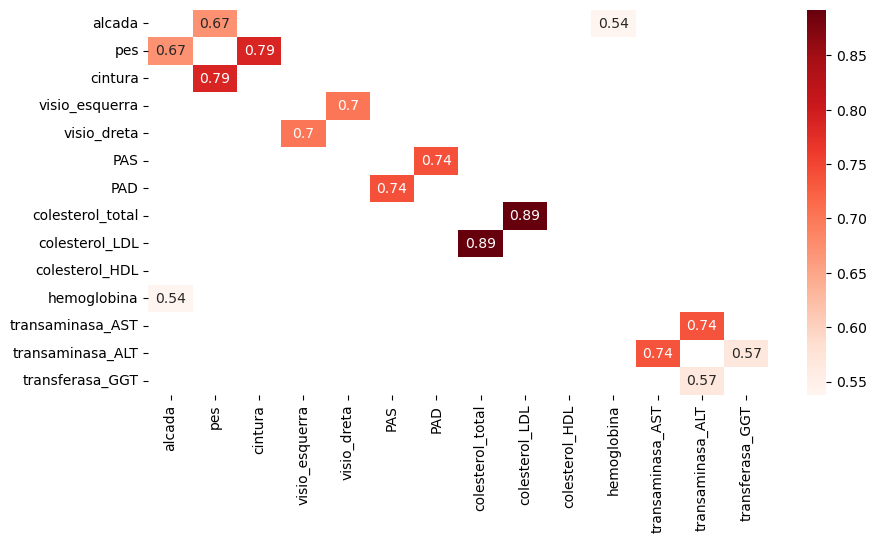

In [3]:
# Seleccionem les variables que ens visualitzat que tenen relació entre elles
# Representrem en un mapa de calor la matriu de correlació de les variables seleccionades
# Destaquem només els valors que poden representar algun tipus de relació de depèndencia entre variables

df=dataset[['alcada', 'pes', 'cintura', 'visio_esquerra',
       'visio_dreta',  'PAS', 'PAD',
       'colesterol_total', 'colesterol_LDL','colesterol_HDL',
       'hemoglobina', 'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT'
       ]]

df=df.sample(n=5000,random_state=1)
mc=df.corr()
# Filtrem els valor majors a 0.5 i menors a -0.5
mcF=mc[((mc >= .5) | (mc <= -.5)) & (mc !=1.000)]
plt.figure(figsize=(10,5))
sns.heatmap(mcF, annot=True, cmap="Reds",annot_kws={'size': '10'})

Correlacio:  0.5590543533775784


<Axes: xlabel='alcada', ylabel='hemoglobina'>

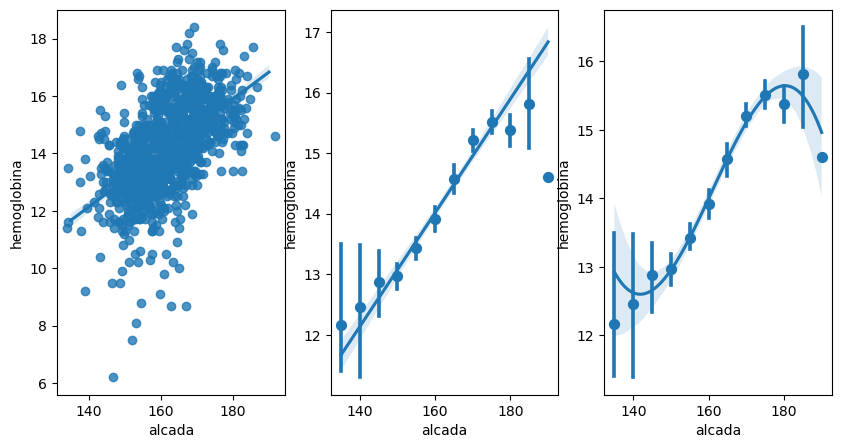

In [7]:
#alcada hemoglobina
# A diferència d'altres relacions que ens poden semblar mes coherents, ens troben amb aquest lleu correlació
# mentre l'alçada de l'individu i la concentració d'hemoglobina. 
# Fem un cop d'ull a la distribució d'aquetes dues variables.
df=df.sample(n=1000,random_state=1)
df.reset_index(drop=True,inplace=True)
print('Correlacio: ',df['alcada'].corr(df['hemoglobina']))
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10, 5))
#sns.jointplot(data=df, x='alcada',y='hemoglobina',kind='reg')
# Afegim algo de soroll per coregir la discrettitacio de les dades x
sns.regplot(data=df,x="alcada", y="hemoglobina",x_jitter=2.5,ax=axes[0]) #afegim soroll per compensar la discretització
# Representem una estimació de la tendència central juntament amb un interval de confiança
sns.regplot(data=df,x="alcada", y="hemoglobina",x_estimator=np.mean,ax=axes[1])
# Provem una regressio polinomial de grau 3
sns.regplot(data=df,x="alcada", y="hemoglobina",x_estimator=np.mean,ax=axes[2],order=3)

Correlacio:  0.8923380427215891


<Figure size 500x500 with 0 Axes>

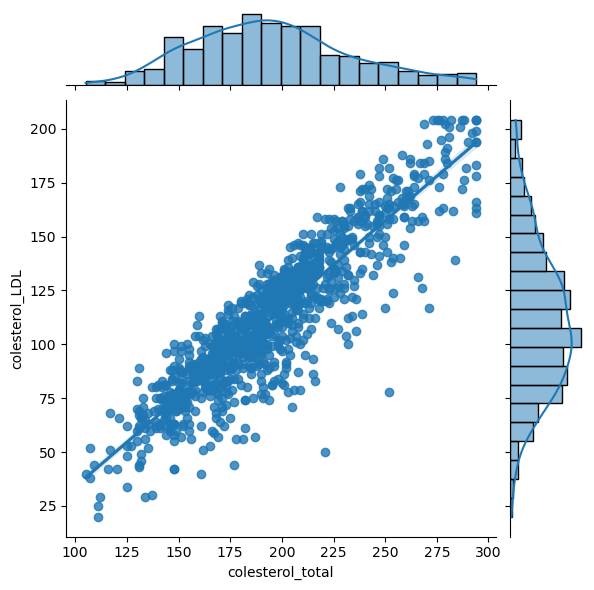

In [8]:
# colesterol total i lDL
# En aquest cas si que es veu clarament la correlació entre les variables i això ens
# justifica el desenvolupament i anàlisis d'un model que veure mes endavant en aquests mateix document

print('Correlacio: ',dataset['colesterol_total'].corr(dataset['colesterol_LDL']))
fig = plt.figure(figsize=(5, 5))
sns.jointplot(data=df, x='colesterol_total',y='colesterol_LDL',kind='reg')
#sns.regplot(data=df,x='colesterol_total', y='colesterol_LDL');

Correlacio:  0.696677781097652


<Axes: xlabel='visio_dreta', ylabel='visio_esquerra'>

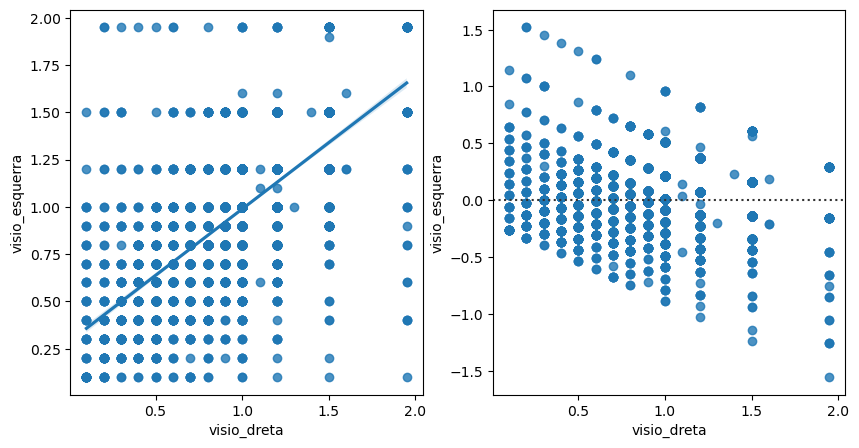

In [142]:
# visio dreta i esquerra
# l'aleatorietat dels residus al voltant de l'eix y ens sugereix que el model lineal podria ser adequat
# En cavi l'scatterplot no és mostra clarament una posible dependencia entre variables

print('Correlacio: ',dataset['visio_dreta'].corr(dataset['visio_esquerra']))
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
sns.regplot(data=df, x='visio_dreta',y='visio_esquerra',ax=axes[0])
sns.residplot(data=df, x='visio_dreta',y='visio_esquerra',ax=axes[1])

Correlacio:  0.7551435248458092


<Axes: xlabel='transaminasa_AST', ylabel='transaminasa_ALT'>

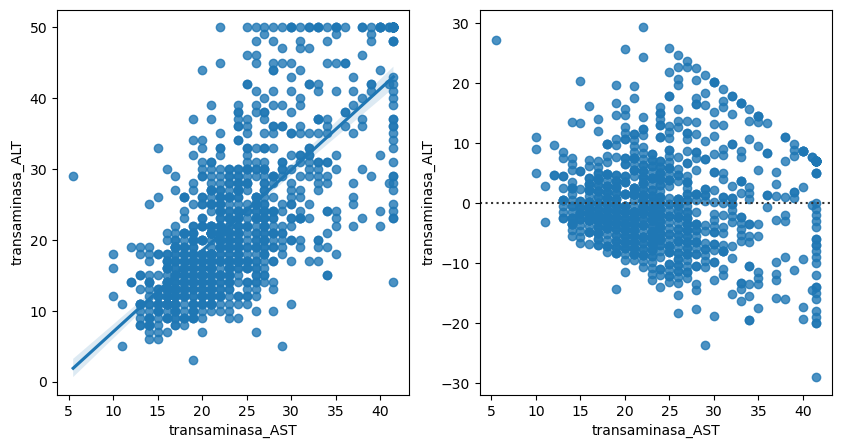

In [9]:
# Transaminasa AST i ALT
# l'aleatorietat dels residus al voltant de l'eix y en ssugereix que el model lineal podria ser adequat
# En cavi l'scatterplot no és mostra clarament una posible dependencia entre variables

print('Correlacio: ',dataset['transaminasa_AST'].corr(dataset['transaminasa_ALT']))
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
sns.regplot(data=df, x='transaminasa_AST',y='transaminasa_ALT',ax=axes[0])
sns.residplot(data=df, x='transaminasa_AST',y='transaminasa_ALT',ax=axes[1])

Plantejem un model de regressió lineal entre colesterol total i colesterol LDL i HDL

In [144]:
# Divideixo les dades amb la regla del 80-20, en conjunt de training i conjunt de dades de test
from sklearn.model_selection import train_test_split

X=df[['alcada', 'pes', 'cintura', 'visio_esquerra',
       'visio_dreta',  'PAS', 'PAD',
       'colesterol_LDL','colesterol_HDL',
       'hemoglobina', 'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']]
y=df['colesterol_total']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (4000, 13)
X_test (1000, 13)
y_train (4000,)
y_test (1000,)


Model colesterol LDL - total
Coeficient df determinació: 0.7924833915422991
Coeficient:  [0.97249134]
Intercepció:  85.66276469100039
Model colesterol HDL - total
Coeficient de determinació: 0.028543768306495187
Coeficient:  [0.42964423]
Intercepció:  170.90501751906615


<Axes: title={'center': 'HDL'}>

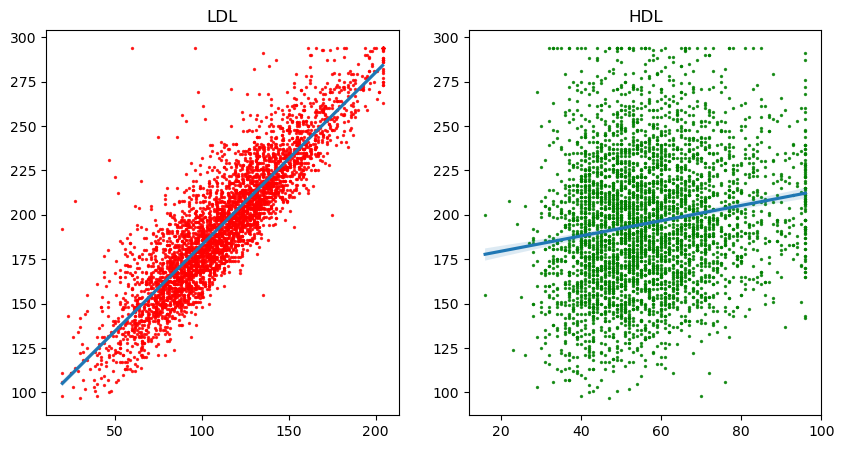

In [145]:
#Plantejem un model de regressio lineal entre colesterol HDL i LDL i colesterol total
from sklearn.linear_model import LinearRegression

# Model 1: model LDL - total

X1_train=X_train['colesterol_LDL'].to_numpy()
X1_train=X1_train.reshape(-1, 1)
X1_test=X_test['colesterol_LDL'].to_numpy()
X1_test=X1_test.reshape(-1, 1)

#y1_train=y_train['coleterol_total'].to_numpy()
y1_train=y_train.to_numpy()
y1_test=y_test.to_numpy()

model1 = LinearRegression()
model1.fit(X1_train,y1_train)

print("Model colesterol LDL - total")
r_sq = model1.score(X1_train, y1_train)
print(f"Coeficient df determinació: {r_sq}")
print('Coeficient: ',model1.coef_)
print('Intercepció: ',model1.intercept_)

# Model 2: Model HDL - total
print("Model colesterol HDL - total")

X2_train=X_train['colesterol_HDL'].to_numpy()
X2_train=X2_train.reshape(-1, 1)
X2_test=X_test['colesterol_HDL'].to_numpy()
X2_test=X2_test.reshape(-1, 1)
y2_train=y_train.to_numpy()
y2_test=y_test.to_numpy()

model2 = LinearRegression()

model2.fit(X2_train, y2_train)


r_sq = model2.score(X2_train, y2_train)
print(f"Coeficient de determinació: {r_sq}")
print('Coeficient: ',model2.coef_)
print('Intercepció: ',model2.intercept_)

#Representació gràfica
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('LDL')
sns.regplot(x=X1_train,y=y1_train,scatter_kws={"color": "red","s":2})
plt.subplot(122)
plt.title('HDL')
sns.regplot(x=X2_train,y=y2_train,scatter_kws={"color": "green","s":2})


In [123]:
#Predicció i avaluació del model colesterol LDL - total, utilitzant sklearn.metrics

predict_train = model1.predict(X1_train)
predict_test = model1.predict(X1_test)

print('Model 1: regresió lineal colesterol LDL - total')
from sklearn.metrics import r2_score
print('Train R square:',r2_score(y1_train,predict_train))
print('Test R square:',r2_score(y1_test,predict_test))

from sklearn.metrics import mean_squared_error
import math
print('Train MSE:',mean_squared_error(y1_train, predict_train))
print('Test MSE:',mean_squared_error(y1_test, predict_test))

#guardem els avaluadors del model pel resum i la comparativa posterior
df_resultats=pd.DataFrame(columns=['Model', 'R2_train', 'R2_test', 'MSE_train', 'MSE_test'])

result_model1=['regresió lineal colesterol LDL - total',
        r2_score(y1_train,predict_train),
        r2_score(y1_test,predict_test),
        mean_squared_error(y1_train,predict_train),
        mean_squared_error(y1_test,predict_test)]                                  

df_resultats.loc[len(df_resultats)]=result_model1


Model 1: regresió lineal colesterol LDL - total
Train R square: 0.8101732898261669
Test R square: 0.7296940325515915
Train MSE: 275.6685125389364
Test MSE: 420.48999025750004


Tant en el datasets de training com en el de test els valors de les mètriques d'avaluació R2 i MSE són força similars. Podem deduir que aquest model ens explica el 80% de la variable dependent colesterol total

In [125]:
#Predicció i avaluació del model colesterol HDL - total, utilitzant sklearn.metrics

predict_train = model2.predict(X2_train)
predict_test = model2.predict(X2_test)

print('Model 2: regresió lineal colesterol HDL - total')
from sklearn.metrics import r2_score
print('Train R square:',r2_score(y2_train,predict_train))
print('Test R square:',r2_score(y2_test,predict_test))

from sklearn.metrics import mean_squared_error
import math
print('Train MSE:',mean_squared_error(y_train, predict_train))
print('Test MSE:',mean_squared_error(y_test, predict_test))

result_model2=['regresió lineal colesterol HDL - total',
        r2_score(y2_train,predict_train),
        r2_score(y2_test,predict_test),
        mean_squared_error(y2_train, predict_train),
        mean_squared_error(y2_test, predict_test)]                                  
df_resultats.loc[len(df_resultats)]=result_model2


Model 2: regresió lineal colesterol HDL - total
Train R square: 0.05099301072292206
Test R square: -0.01913798059986571
Train MSE: 1378.1587685078505
Test MSE: 1585.3786861560054


Com ja haviem vist en la matriu de correlació el model de regressió lineal que té com a variable independent el colesterol HDL i com a variable dependent el colesterol total no és gaire reixit, pero no dir gens. Ni en el conjunt d'entrenament ni, com era de preveure, en el conjunt de test els resultats permeten explicar el comportament de la variable dependent.

Plantejem un model de regressió lineal múltiple entre colesterol total i colesterol LDL i HDL

In [126]:
#Plantejem un model de regressio lineal entre colesterol total i colesterol LDL
from sklearn.linear_model import LinearRegression

#creem el model LDL

X3_train=X_train[['colesterol_LDL','colesterol_LDL']].to_numpy()
#X3_train=X3_train.reshape(-1, 1)
X3_test=X_test[['colesterol_LDL','colesterol_LDL']].to_numpy()
#X3_test=X1_test.reshape(-1, 1)

y3_train=y_train.to_numpy()
y3_test=y_test.to_numpy()

model3 = LinearRegression()
model3.fit(X3_train,y3_train)

print("Model colesterol LDLHDL - total")
r_sq = model3.score(X3_train, y3_train)
print(f"Coeficient de determinació: {r_sq}")
print('Coeficient: ',model3.coef_)
print('Intercepció: ',model3.intercept_)



Model colesterol LDLHDL - total
Coeficient de determinació: 0.8101732898261669
Coeficient:  [0.49563895 0.49563895]
Intercepció:  82.46088687208228


In [127]:
#Predicció i avaluació del model colesterol LDLHDL - total, utilitzant sklearn.metrics

predict_train = model3.predict(X3_train)
predict_test = model3.predict(X3_test)

print('Model 1: regresió lineal colesterol LDL - total')
from sklearn.metrics import r2_score
print('Train R square:',r2_score(y3_train,predict_train))
print('Test R square:',r2_score(y3_test,predict_test))

from sklearn.metrics import mean_squared_error
import math
print('Train MSE:',mean_squared_error(y3_train, predict_train))
print('Test MSE:',mean_squared_error(y3_test, predict_test))

#guardem els avaluadors del model pel resum i la comparativa posterior
df_resultats=pd.DataFrame(columns=['Model', 'R2_train', 'R2_test', 'MSE_train', 'MSE_test'])

result_model3=['regresió lineal colesterol LDL - total',
        r2_score(y3_train,predict_train),
        r2_score(y3_test,predict_test),
        mean_squared_error(y3_train,predict_train),
        mean_squared_error(y3_test,predict_test)]                                  

df_resultats.loc[len(df_resultats)]=result_model3


Model 1: regresió lineal colesterol LDL - total
Train R square: 0.8101732898261669
Test R square: 0.7296940325515915
Train MSE: 275.6685125389364
Test MSE: 420.4899902575


Els resultats no avalen, en aquest cas, una millora en la regressió múltiple versus la regressió lineal simple

Treballem un model de Random Forest Regression utilitzant com a variables independent tots els atributs, excepte el corresponent a la variable dependent.  
En el cas de la regressió a aquesta técnica combina el resultat de múltiples arbres de decisió per obtenir una predicció precisa. Cadascun dels arbres es crea sobre una mostra aleatoria de les dades  i un conjunt aleatori d'atributs. Les prediccions de tots els arbres es combinen per obtenir una predicció final.


In [128]:
# Importació del model
from sklearn.ensemble import RandomForestRegressor

#creem el model

X4_train=X_train.to_numpy()
X4_test=X_test.to_numpy()
y4_train=y_train.to_numpy()
y4_test=y_test.to_numpy()


# Instantiate model with 1000 decision trees
model4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model4.fit(X4_train, y4_train)

r_sq = model4.score(X4_train, y4_train)
print(f"coeficient de determinació: {r_sq}")


coeficient de determinació: 0.9817903349522666


In [129]:
#Predicció i avaluació del model Random Forest Regression, utilitzant sklearn.metrics

predict_train = model4.predict(X4_train)
predict_test = model4.predict(X4_test)

print('Model 4: Random Forest Regression')
from sklearn.metrics import r2_score
print('Train R square:',r2_score(y4_train,predict_train))
print('Test R square:',r2_score(y4_test,predict_test))

from sklearn.metrics import mean_squared_error
import math
print('Model 4: Random Forest Regression')
print('Train MSE:',mean_squared_error(y4_train, predict_train))
print('Test MSE:',mean_squared_error(y4_test, predict_test))

result_model4=['Random Forest Regression',
        r2_score(y4_train,predict_train),
        r2_score(y4_test,predict_test),
        mean_squared_error(y4_train, predict_train),
        mean_squared_error(y4_test, predict_test)]                                  
df_resultats.loc[len(df_resultats)]=result_model4

Model 4: Random Forest Regression
Train R square: 0.9817903349522666
Test R square: 0.8089785573546027
Model 4: Random Forest Regression
Train MSE: 26.4442831725
Test MSE: 297.15438883999997


En aquest model es manté un alt percentatge de resolució de la variable dependent 'Colesterol_total', que es manté força alt en aplicar-lo al dataset de prova

En aquest cas és força interesant visualitzar quins són els atributs que tenen una relevancia major a l'hora d'explicar la variable dependent

In [130]:
# Apliquem el model a les dades de prova
predict_test = model4.predict(X4_test)
# Calculem els errors absoluts
errors = abs(predict_test - y4_test)
# Calculem la mitja dels valors absoluts (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculem l'error percentual mitjà absolut (MAPE)
mape = 100 * (errors / y4_test)
# Calculem i visualitzem la precissió
precisio = 100 - np.mean(mape)
print('Precisió:', round(precisio, 2), '%.')

# Obtenim la importancia numèrica dels atributs
importancies = list(model4.feature_importances_)
#columnes=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
columnes=['alcada', 'pes', 'cintura', 'visio_esquerra',
       'visio_dreta',  'PAS', 'PAD',
       'colesterol_LDL','colesterol_HDL',
       'hemoglobina', 'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']
# Llista de tuples (atribut, importancia)
atrib_importancies = [(feature, round(importancies, 2)) for feature, importancies in zip(columnes, importancies)]
# Ordenem les importancies dels atributs de major a menor
atrib_importancies = sorted(atrib_importancies, key = lambda x: x[1], reverse = True)
# Presentem resultats 
[print('Variable: {:20} Importancia: {}'.format(*pair)) for pair in atrib_importancies];

Mean Absolute Error: 12.42
Precisió: 93.68 %.
Variable: colesterol_LDL       Importancia: 0.83
Variable: colesterol_HDL       Importancia: 0.08
Variable: alcada               Importancia: 0.01
Variable: pes                  Importancia: 0.01
Variable: cintura              Importancia: 0.01
Variable: PAS                  Importancia: 0.01
Variable: PAD                  Importancia: 0.01
Variable: hemoglobina          Importancia: 0.01
Variable: transaminasa_AST     Importancia: 0.01
Variable: transaminasa_ALT     Importancia: 0.01
Variable: transferasa_GGT      Importancia: 0.01
Variable: visio_esquerra       Importancia: 0.0
Variable: visio_dreta          Importancia: 0.0


D'aquest estudi deduïm que els atributs rellevants a l'hora d'explicar la variable dependent 'Colesterol total' son 'colesterol LDL' i en menor mesura 'colesterol_HDL'. La influència de la resta d'atributs és residual